In [730]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import scipy.ndimage.filters as filters;
%matplotlib inline

from itertools import product
import numpy.fft

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np

In [3]:
a = np.array(3, 3)

TypeError: data type not understood

In [4]:
a = np.zeros((3,3))

In [66]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [14]:
a.shape

(3, 3)

In [17]:
a[1:, 1:]

array([[ 5.,  0.],
       [ 0.,  0.]])

In [19]:
from PIL import Image, ImageFilter


In [669]:
im = Image.open("../images/odchinki/easy2.jpeg")
im = im.resize((im.size[0]//3, im.size[1]//3), Image.BICUBIC)
contours = im.filter(ImageFilter.CONTOUR).convert("L")
arr = 255-np.array(contours)

arr[0,:]  = 0
arr[-1,:] = 0
arr[:,0]  = 0
arr[:,-1] = 0

arr = arr.astype(np.float64)
arr = arr - arr.min()
arr /= arr.max()
arr *= 255

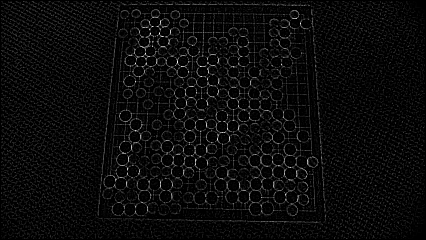

In [677]:
Image.fromarray(arr.astype(np.uint8))

In [40]:
def calculate_radius(x, y, angle):
    return np.sin(angle)*x + np.cos(angle)*y

In [406]:
def transform(inp, oshape):
    max_radius = np.sqrt(inp.shape[0]*inp.shape[0] + inp.shape[1]*inp.shape[1])
    out = np.zeros(oshape)
    sin_a = np.zeros(oshape[0])
    cos_a = np.zeros(oshape[0])
    for angle in range(oshape[0]):
        sin_a[angle] = np.sin(2*np.pi*(angle/oshape[0]))
        cos_a[angle] = np.cos(2*np.pi*(angle/oshape[0]))
    print(inp.shape[0]*inp.shape[1]*oshape[0], flush=True)
    for (x,y) in product(range(inp.shape[0]), range(inp.shape[1])):
        for angle in range(oshape[0]):
            radius = sin_a[angle]*x + cos_a[angle]*y
            radius = (radius/(2 * max_radius)) + 0.5
            output_r = int(oshape[1]*radius)
            if 0 <= output_r <= oshape[1] - 1:
                out[angle, output_r] += inp[x, y]
    return out
                

In [382]:
def draw_line(image, oshape, angle, radius):
    max_radius = np.sqrt(image.shape[0]*image.shape[0] + image.shape[1]*image.shape[1])
    sin_a = np.sin(2*np.pi * (angle/oshape[0]))
    cos_a = np.cos(2*np.pi * (angle/oshape[0]))
    r = (radius/oshape[1] - 0.5)*2*max_radius
    for x in range(image.shape[0]):
        t0 = int((r - (x-1)*sin_a)/cos_a)
        t1 = int((r - x*sin_a)/cos_a)
        tmin = max(0, min(t0, t1))
        tmax = min(image.shape[1]-1, max(t0, t1) + 1)
        for y in range(tmin, tmax+1):
            image[x,y] = 255
        
        

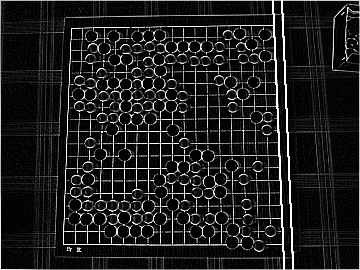

In [504]:
arr2=arr.copy()
draw_line(arr2, (600, 400), 300, 40)
draw_line(arr2, (600, 400), 296, 75)
draw_line(arr2, (600, 400), 296, 79)
arr2 = arr2.astype(np.uint8)
Image.fromarray(arr2)

In [268]:
arr.shape

(270, 360)

In [76]:
x.max

<function ndarray.max>

In [77]:
x.max()

90467546.0

In [78]:
x.min()

0.0

In [671]:
x = transform(arr, (600, 400))
y = (x*255 / x.max()).astype(np.uint8)

61344000


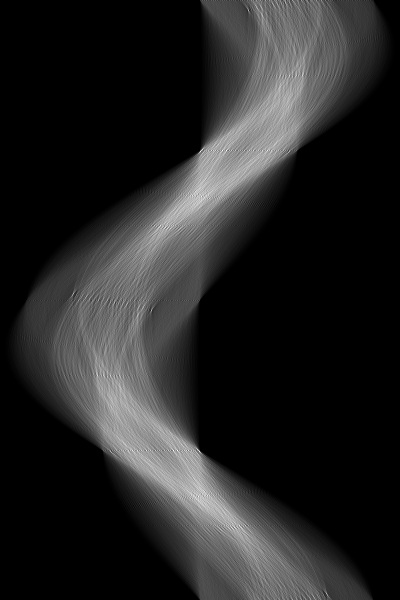

In [672]:
Image.fromarray(y)

Image.fromarray(y_b)

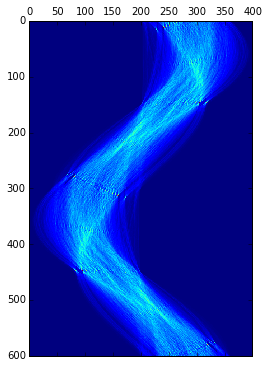

In [651]:
plt.matshow(x )

In [521]:
x.argsort()

array([[  0, 152, 153, ..., 260, 359, 200],
       [  0, 151, 152, ..., 266, 360, 200],
       [  0, 150, 151, ..., 251, 230, 246],
       ..., 
       [  0, 150, 151, ..., 263, 321, 325],
       [  0, 151, 152, ..., 322, 264, 301],
       [  0, 151, 152, ..., 291, 358, 199]])

In [524]:
arr[0,0]

180

### Image.fromarray(y)

In [627]:
xbb = filters.gaussian_filter(x, 3)

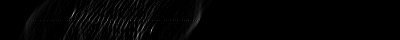

In [728]:
a = filters.gaussian_filter(x, 0.5)  - filters.gaussian_filter(x, 4)
for (i,j) in product(range(a.shape[0]), range(a.shape[1])):
    a[i,j] = max(a[i,j], 0)
a /= a.max()
b = (a*255).astype(np.uint8)
Image.fromarray(b[280:320, :])

[(151, 200), (451, 199), (149, 202), (449, 197)]


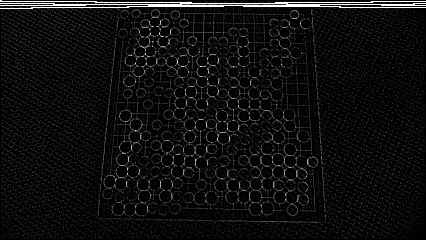

In [676]:
offsets = b.argsort(axis=None)[::-1][:4]
q=[ (o // b.shape[1], o % b.shape[1]) for o in offsets]
arr2=arr.copy()
print(q)
for (p,l) in q:
  #   if 110 <= p <= 200:
        draw_line(arr2, (600, 400), p,l)
arr2 = arr2.astype(np.uint8)
Image.fromarray(arr2)

In [711]:
def good(lst, val, period):
    for t in lst:
        q = (val - t + 5*period)% period
        if q < (period // 10) or (q > period - (period//10)):
            return False
    return True

In [737]:
def good2(lst, val):
    (x_v, y_v) = val
    for (x, y) in lst:
        if (x-x_v)*(x-x_v) + (y-y_v)*(y-y_v) <= 7:
            return False
    return True

In [747]:
def get_band(ba, start, stop):
    offsets = ba.argsort(axis=None)[::-1]
    q=[ (o // ba.shape[1], o % ba.shape[1]) for o in offsets]
    l=[]
    for (u, v) in q:
        if start <= u <= stop and good2(l, (u,v)):
            l.append((u,v))
    return l

In [755]:
def draw_band(ba, start, stop, img):
    s = get_band(ba, start, stop)[:20]
    for (p,l) in s:
        draw_line(img, (600, 400), p,l)

In [751]:
s

[(293, 73),
 (310, 151),
 (315, 137),
 (302, 114),
 (308, 142),
 (307, 138),
 (296, 86),
 (300, 78),
 (305, 144),
 (303, 127),
 (300, 98),
 (299, 107),
 (304, 122),
 (296, 71),
 (299, 89),
 (300, 83),
 (295, 82),
 (320, 137),
 (300, 134),
 (298, 103)]

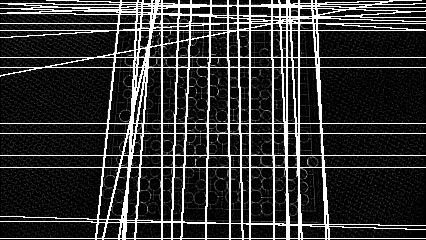

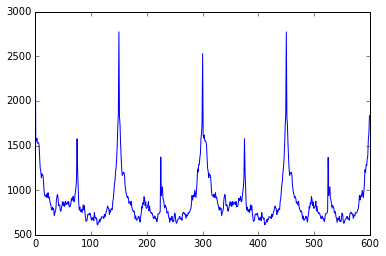

In [757]:
xx = np.zeros(b.shape[0])
for i in range(b.shape[0]):
    xx[i] = b[i].sum()

plt.plot(range(len(xx)), xx)
period = 300
dd = xx.argsort()[::-1]
l = []
for i in range(2):
    for j in range(len(dd)):
        if good(l, dd[j], period) and (period//10 < dd[j] < 2*period - (period//10)):
            l.append(dd[j])
            break
arr2 = arr.copy()        
for i in l:
    draw_band(b, i-30, i+30, arr2)
Image.fromarray(arr2.astype(np.uint8))
    

In [710]:
good([450], 300, 300)

False

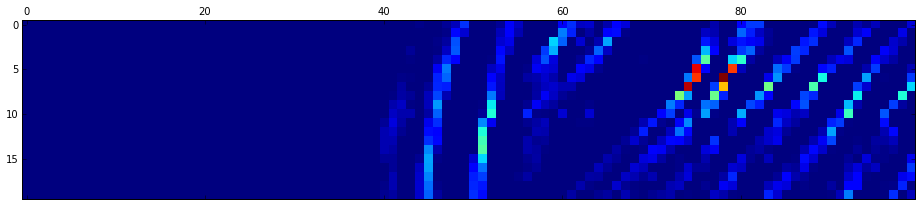

In [571]:
b[296,75]

151

In [570]:
b[299,392]

0

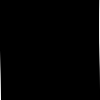

In [87]:
Image.fromarray(z)

In [88]:
z

array([[  0,   0,   0, ...,   0,   0, 206],
       [  0,   0,   0, ...,   0,   0, 209],
       [  0,   0,   0, ...,   0,   0, 212],
       ..., 
       [248,   0,   0, ...,   0,   0,   0],
       [251,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [89]:
z=(np.sqrt(y)*255).astype(np.uint8)

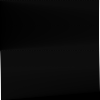

In [90]:
Image.fromarray(z)

In [91]:
arr[77,33]

247

In [92]:
255-arr

array([[182, 180, 181, ..., 210, 210, 214],
       [181,  19,   0, ...,  14,   0, 214],
       [179,   2,   0, ...,  14,   0, 213],
       ..., 
       [243,   8,   3, ...,   0,   0, 203],
       [241,   2,   1, ...,   0,   1, 201],
       [241, 241, 238, ..., 205, 206, 203]], dtype=uint8)

In [93]:
arr=255-arr

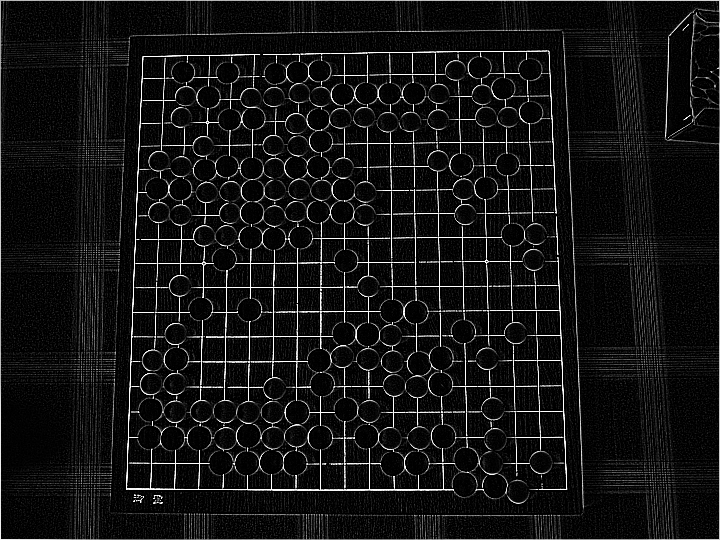

In [128]:
Image.fromarray(arr)

In [129]:
y=transform(arr, 100, 100)

38880000


In [133]:
y[:, 53].max()

55096.0

In [96]:
y

array([[  1.11172000e+05,   5.26400000e+03,   1.04010000e+04, ...,
          1.49620000e+04,   2.99500000e+04,   6.57846300e+06],
       [  8.30900000e+03,   9.36600000e+03,   9.20200000e+03, ...,
          5.41000000e+03,   5.53300000e+03,   6.75836000e+06],
       [  4.38500000e+03,   4.26700000e+03,   6.95600000e+03, ...,
          1.19990000e+04,   1.09160000e+04,   6.78989300e+06],
       ..., 
       [  7.55962300e+06,   8.95700000e+03,   8.62800000e+03, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  7.59507900e+06,   1.00290000e+04,   9.19900000e+03, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  7.63273900e+06,   1.23220000e+04,   1.05730000e+04, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [97]:
y[55]

array([  732136.,    16807.,    16278.,    17508.,    19496.,    21040.,
          20771.,    19946.,    18992.,    20749.,    19747.,    18129.,
          20844.,    20847.,    18686.,    20144.,    18048.,    17640.,
          20302.,    20856.,    20990.,    22871.,    24013.,    23505.,
          19523.,    23598.,    21523.,    21763.,    19619.,    19141.,
          22676.,    23195.,    22957.,    20126.,    21887.,    21298.,
          19480.,    22252.,    23562.,    19677.,    18744.,    19641.,
          18138.,    20813.,    19405.,    17376.,    22960.,    20506.,
          19433.,    19191.,    18382.,    22285.,    21281.,    21307.,
          21190.,    21307.,    21158.,    20041.,    18676.,    18716.,
          20388.,    20499.,    20479.,    20112.,    17004.,    16706.,
          18068.,    16612.,    19866.,    20729.,    21131.,    20021.,
          23033.,    22882.,    22618.,    22119.,    21656.,    17655.,
          15901.,    15606.,    17928.,    16832., 

In [98]:
y =  max(y, 50000)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [99]:
?y.squeeze

In [138]:
for (i,j) in product(range(y.shape[0]), range(y.shape[1])):
    y[i,j] = min(y[i,j], 56000)

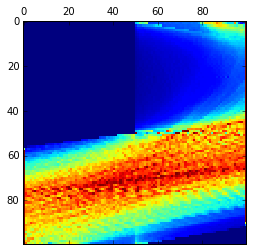

In [139]:
plt.matshow(y)

In [106]:
y.max

<function ndarray.max>

In [107]:
y.max()

7632739.0

In [137]:
z=np.zeros((100, 100))
z[30,30] = 255
z[30, 43] = 255
t = transform(z, 100, 100)

1000000


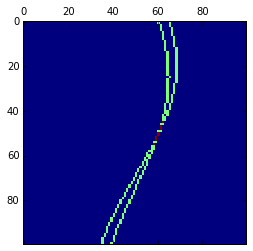

In [136]:
plt.matshow(t)

In [118]:
plt.max()

AttributeError: 'module' object has no attribute 'max'

In [119]:
t.max()

0.0

In [120]:
z=[30,30]=1

SyntaxError: can't assign to literal (<ipython-input-120-d7307d91719a>, line 1)